<h1><center> ITESO </center></h1>                                                                          
<h1><center> DEPARTAMENTO DE MATEMÁTICAS Y FÍSICA  </center></h1>                                                 <h3><center>Asignatura: Ciencia de Datos e Inteligencia de Negocios</center></h3>                          
<h3><center> EXAMEN 2 : Preprocesamiento de datos (Clustering, reducción de características y aprendizaje máquina) <h3><center> 
<h4><center>Tipo: C<h4><center>


## Nombre:
<hr>   

<h2>Instrucciones</h2>

- Lea detenidamente los reactivos y responda con claridad. Si se requiere hacer uso de más hojas para la realización de cálculos, es necesario que se adjunten a este cuando se haga entrega del examen.

- Responda de manera ordenada los reactivos.

- Por cada respuesta de cada reactivo se calificará __código, figuras y comentarios__.


<h2>Tabla de Reactivos</h2>

1. [Reactivo 1 (2.5 ptos)](#Problema1)
2. [Reactivo 2 (2.5 ptos)](#Problema2)
3. [Reactivo 3 ](#Problema3)
    1. [Reactivo 3.1 (1.5 ptos)](#Problema3.1)
    2. [Reactivo 3.2 (1.5 ptos)](#Problema3.2)
4. [Reactivo 4 (2 ptos)](#Problema4)

<hr>   
    

<hr>  

### Reactivo 1 (2.5 ptos) <a name="Problema1"></a> 

En un experimento se logró identificar que 9 variables podían ser consideradas como importantes. Estas variables determinaban el comportamiento global del experimento. Después de haber hecho exhaustivos experimentos se logró recoger muestras de diferentes condiciones de trabajo. Los resultados de estas muestras se encuentran en el archivo `“ex2c_1_2.csv”`.  

Haciendo uso del archivo `“ex2c_1_2.csv”`, determine cuantos grupos o patrones se encuentran en los datos recopilados y justifique su respuesta con código, figuras o mediciones. 

**Respuesta:**

Primero instalamos las librerías pertinentes.

In [14]:
import pandas as pd
import numpy as np
import scipy.spatial.distance as sc
import matplotlib.pyplot as plt
import sklearn.metrics as skm
from scipy.cluster import hierarchy

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from sklearn.metrics import pairwise_distances_argmin_min
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

pd.core.common.is_list_like = pd.api.types.is_list_like

from datetime import datetime

import matplotlib.image as mpimg
import scipy.optimize as opt

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import (accuracy_score, precision_score, recall_score)

Abrimos y observamos la base de dato a utilizar.

In [15]:
R1 = pd.read_csv('../Data/ex2c_1_2.csv')
R1

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,0,-9.789038,-10.183401,-11.071508,-9.680577,-9.123584,-9.597456,-10.429774,-9.115546,-9.469227
1,1,9.169743,8.891072,10.258349,10.212325,9.277643,10.888351,10.316669,9.532055,10.080293
2,2,11.537711,-9.026319,10.596807,10.368023,-10.538868,11.794866,11.883334,-9.010172,11.279577
3,3,-8.646815,-10.167775,-9.281632,-8.193995,-11.473597,-11.113191,-9.728394,-8.245748,-10.596521
4,4,10.069251,8.838398,10.327026,10.567333,10.901592,11.877143,10.430613,8.809216,10.226212
...,...,...,...,...,...,...,...,...,...,...
2995,2995,8.809025,-11.722623,10.135194,9.741332,-11.694605,11.545905,10.019660,-11.266223,9.304520
2996,2996,9.247578,12.647641,8.620412,10.269084,10.312668,10.706524,10.212957,10.804841,10.233441
2997,2997,10.981121,9.981451,10.119669,10.426402,9.543049,9.570979,9.944963,8.923105,9.642297
2998,2998,12.010060,10.638254,9.627892,10.101772,11.115819,10.422146,7.817674,9.093349,8.587683


Utilizamos el criterio del codo para poder observar el númerod e grupos en la base de datos. Lo graficamos para apreciarlo visualmente.

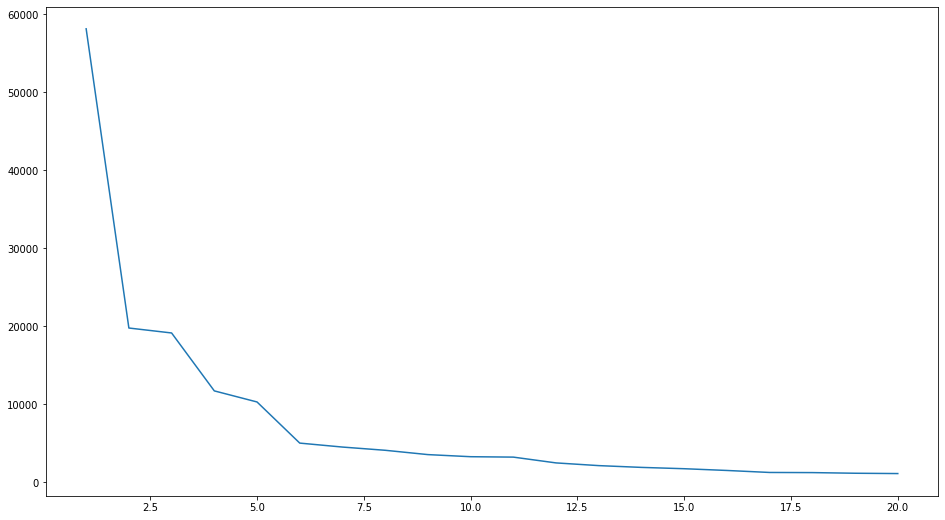

In [194]:
Z = hierarchy.linkage(R1, metric='euclidean', method = 'ward') 

last = Z[-20:,2]
lastR = last[::-1]
idxs = np.arange (1, len(lastR)+1)
plt.plot(idxs, lastR)
plt.show()

Hacemos lo propio con el criterio del gadiente.

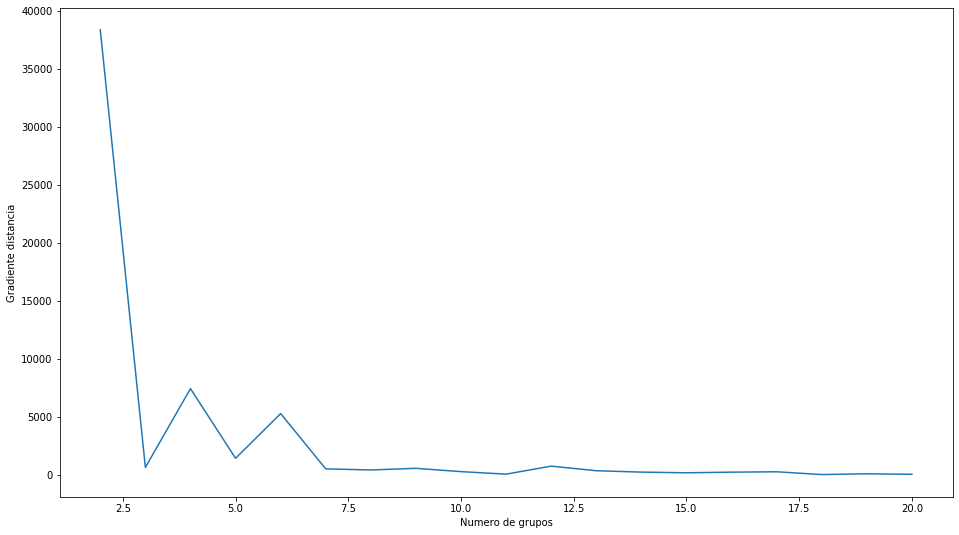

In [195]:
gradiente = np.diff(last)
gradR = gradiente[::-1]
plt.plot(idxs[1:],gradR)

plt.xlabel('Numero de grupos')
plt.ylabel('Gradiente distancia')
plt.show()

Hemos realizado los métodos del codo y el gradiente. Tras observar la representación gráfica concluimos que le número óptimo de grupos es 3 para esta base de datos es 3. Esto debido a los puntos de inflexión en las gráficas.



<hr>   

### Reactivo 2 (2.5 ptos) <a name="Problema2"></a> 

Considere la base de datos `“ex2c_2_2.csv”`. Esta base de datos contiene 3 dimensiones. 

    1. Explique y justifique si ¿es posible hacer una reducción de las variables por medio del “PCA” a una sóla variable?.
    2. Muestre en un gráfico los datos después de la reducción.

**Respuesta:**

### 1.

El objetivo del PCA es la reducción de variables, se busca reducir la dimensionalidad de la base de datos de forma en la cua la perdida de datos sea muy baja con el fin de que se utilice menor trabajo para procesar pero los resultados sean fieles a la realidad. Esto no es posible al reducir a una sola variable. Se requiere más de un componente principal.

### 2.

Primero instalamos las librerías pertinentes.

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Abrimos y observamos la base de dato a utilizar.

In [172]:
plt.rcParams['figure.figsize'] = (16,9)
R2 = pd.read_csv('../Data/ex2c_2_2.csv')
R2 = R2.drop(['Unnamed: 0',], axis=1)
R2

,x1,x2,x3
0,-0.382266,-2.044355,0.0
1,0.006111,1.318978,1.0
2,0.279828,-0.056636,1.0
3,1.015068,1.465985,0.0
4,0.307537,-0.215470,1.0
...,...,...,...
1995,0.009895,-0.733066,1.0
1996,0.495223,-0.178994,1.0
1997,-2.395132,-2.308540,0.0
1998,-1.442297,-1.650665,0.0


Estandarizamos los datos.

In [196]:
scaler = StandardScaler()
scaler.fit(R2)
xS = scaler.transform(R2)
xS

array([[-0.20608173, -1.1678963 , -0.70737196],
       [ 0.01960287,  0.75813945,  1.4136834 ],
       [ 0.17865865, -0.02961505,  1.4136834 ],
       ...,
       [-1.37575209, -1.31918401, -0.70737196],
       [-0.8220627 , -0.94244725, -0.70737196],
       [ 0.38529009, -0.34852949,  1.4136834 ]])

Hacemos uso del PCA.

In [197]:
pca = PCA(n_components = 2) 
pca.fit(xS) 
xPCA = pca.transform(xS)
xPCA

array([[-0.97458443, -0.70575072],
       [ 0.55601887,  1.41326654],
       [ 0.11146042,  1.4126524 ],
       ...,
       [-1.90862838, -0.69902359],
       [-1.25072482, -0.70232151],
       [ 0.03206207,  1.41159255]])

Hacemos una prueba para descubrir la cantidad de componentes a utilizar.

In [198]:
print('tamaño de x_pca', xPCA.shape)
explxPCA = pca.explained_variance_ratio_
print(explxPCA)
print('suma', sum(explxPCA[0:3]))

tamaño de x_pca (2000, 2)
[0.62792741 0.33333208]
suma 0.9612594914232766


Observamos una cantidad superior al 95%.

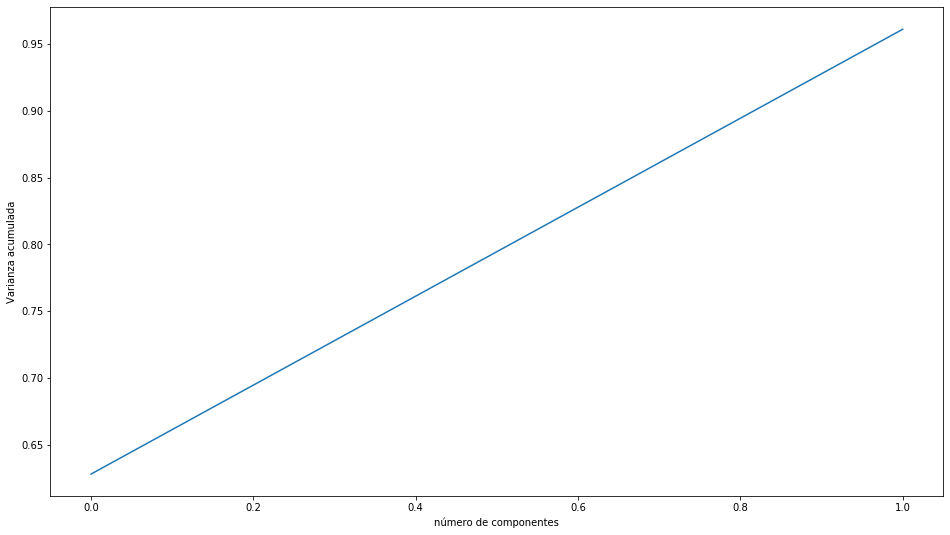

In [199]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('número de componentes')
plt.ylabel('Varianza acumulada')
plt.show()

Estandarizamos los datos.

In [200]:
scaler2 = StandardScaler()
scaler2.fit(R2)

xS2 = scaler.transform(R2)
xS2

array([[-0.20608173, -1.1678963 , -0.70737196],
       [ 0.01960287,  0.75813945,  1.4136834 ],
       [ 0.17865865, -0.02961505,  1.4136834 ],
       ...,
       [-1.37575209, -1.31918401, -0.70737196],
       [-0.8220627 , -0.94244725, -0.70737196],
       [ 0.38529009, -0.34852949,  1.4136834 ]])

Hacemos uso del PCA.

In [202]:
pca2 = PCA(n_components = 2) 
pca2.fit(xS2)
xPCA2 = pca2.transform(xS2)
xPCA2

array([[-0.97458443, -0.70575072],
       [ 0.55601887,  1.41326654],
       [ 0.11146042,  1.4126524 ],
       ...,
       [-1.90862838, -0.69902359],
       [-1.25072482, -0.70232151],
       [ 0.03206207,  1.41159255]])

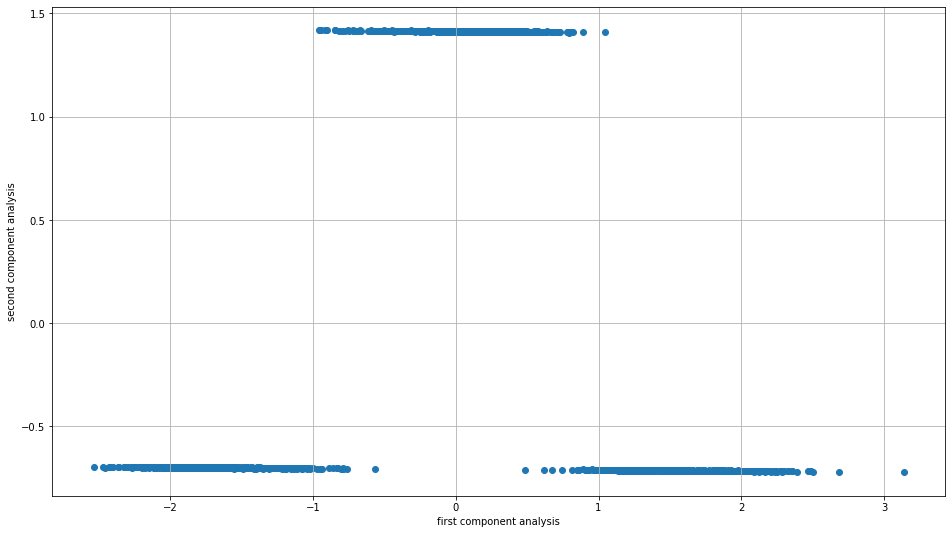

In [203]:
plt.scatter(xPCA2[:,0], xPCA2[:,1])
plt.xlabel('first component analysis')
plt.ylabel('second component analysis')
plt.grid()
plt.show()

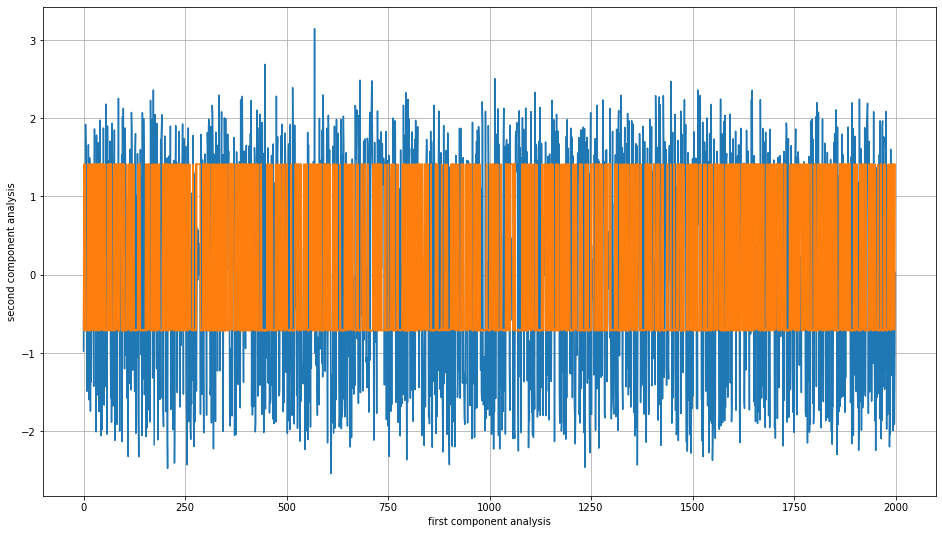

In [204]:
plt.plot(xPCA2)
plt.xlabel('first component analysis')
plt.ylabel('second component analysis')
plt.grid()
plt.show()

Se puede ver en la comparacion la reducción de los datos.

<hr>   

### Reactivo 3  <a name="Problema3"></a> 

Considere la base de datos `“ex2c_4.csv”` se encuentra la información sobre características de varias flores que fueron estudiadas por un botánico. Basado en esta información obtenga lo siguiente:

#### Reactivo 3.1  (1.5 ptos)<a name="Problema3.1"></a> 
Por medio de un algoritmo de `“clustering”` determine cuantos grupos de patrones se pueden determinar en esta base de datos.

**Respuesta:**

Abrimos y observamos la base de dato a utilizar.

In [205]:
C1 = pd.read_csv('../Data/ex2c_4.csv')
C1

,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,2,4.7,3.2,1.3,0.2
3,3,4.6,3.1,1.5,0.2
4,4,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3
146,146,6.3,2.5,5.0,1.9
147,147,6.5,3.0,5.2,2.0
148,148,6.2,3.4,5.4,2.3


Utilizamos el criterio del codo para poder observar el númerod e grupos en la base de datos. Lo graficamos para apreciarlo visualmente.

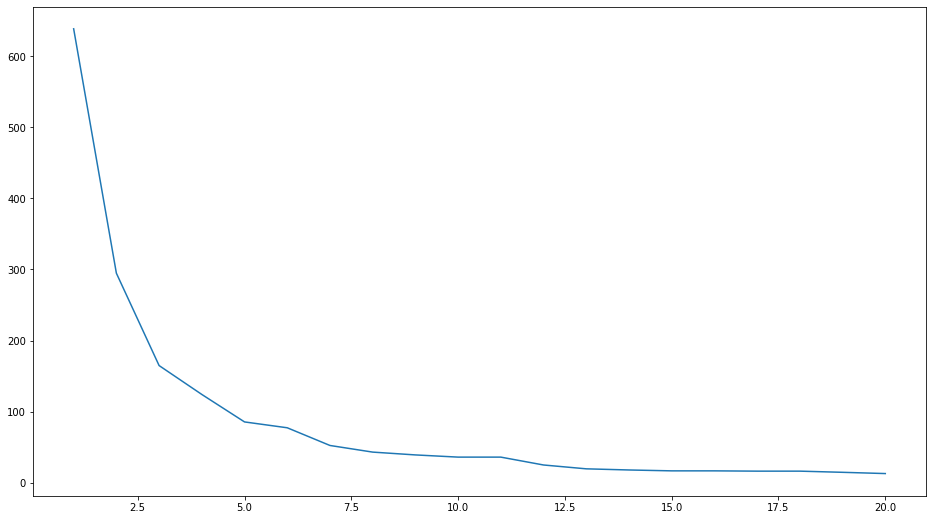

In [206]:
Z2 = hierarchy.linkage(C1, metric='euclidean', method = 'ward') #WARD: es un metodo de aglomeracion


last2 = Z2[-20:,2]
lastR2 = last2[::-1]
idxs2 = np.arange (1, len(lastR2)+1)
plt.plot(idxs2, lastR2)
plt.show()


Hacemos lo propio con el del gradiente.

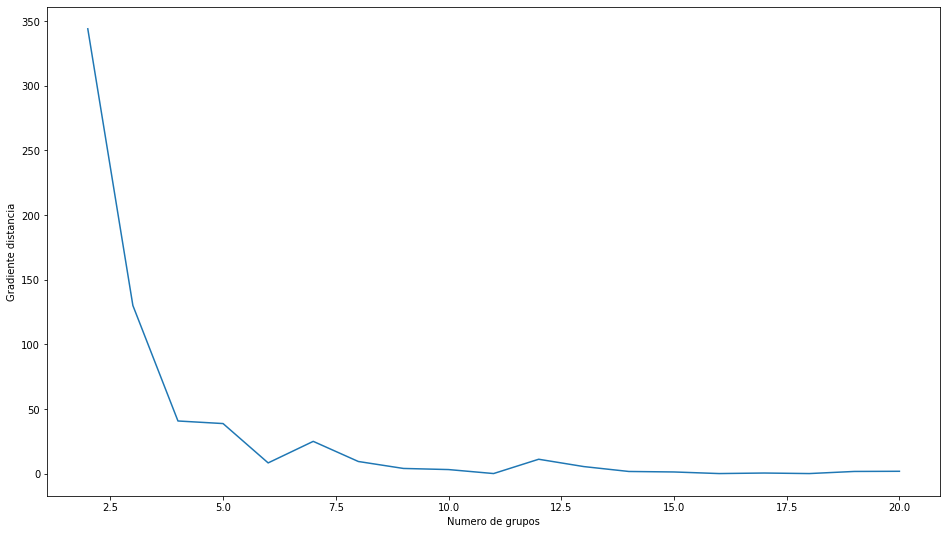

In [207]:
gradiente2 = np.diff(last2)
gradR2 = gradiente2[::-1] 
plt.plot(idxs2[1:],gradR2)

plt.xlabel('Numero de grupos')
plt.ylabel('Gradiente distancia')
plt.show()

Hemos realizado los métodos del codo y el gradiente. Tras observar la representación gráfica concluimos que le número óptimo de grupos se encuentra entre el 3 y 4, decidimos elegir el 4. Esto debido a los puntos de inflexión en las gráficas.

Pasamos a hacer clustering con el número de grupo elegido.

In [209]:
GM2 = 4
G2 = hierarchy.fcluster(Z2, GM2, criterion='maxclust')
G2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [211]:
C22 = cluster1['Unnamed: 0']
UC2 = {'Grupos': G2,
                'No. de dato': C22}
FO2 = pd.DataFrame(union_column2)
FO2

,Grupos,No. de dato
0,2,0
1,2,1
2,2,2
3,2,3
4,2,4
...,...,...
145,4,145
146,4,146
147,4,147
148,4,148


Se determino por medio el clustering la utilización de 4 grupos.

#### Reactivo 3.2  (1.5 ptos)<a name="Problema3.1"></a> 
Aplique el análisis de componentes principales `PCA` en la base de datos original (`“ex2c_4.csv”`) y con la base de datos reducida (como mínimo __90%__ de la información mantenida), vuelva a determinar el número de patrones por medio de un algoritmo de `“clustering”`. ¿Se mantuvo el número de grupos encontrados? Valide su respuesta con gráficas y mediciones.

**Respuesta:**

Modificamos y observamos la base de datos a utilizar.

In [213]:
plt.rcParams['figure.figsize'] = (16,9)

C2 = pd.read_csv('../Data/ex2c_4.csv')
C2 = C2.drop(['Unnamed: 0',], axis=1)
C2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Estandarizamos los datos.

In [214]:
scaler2 = StandardScaler()
scaler2.fit(C2)

xS22 = scaler2.transform(C2)
xS22


array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

Hacemos uso del PCA.

In [215]:
pca2 = PCA(n_components = 4) 
pca2.fit(xS22)
xPCA22 = pca2.transform(xS22)
xPCA22

array([[-2.26454173e+00,  5.05703903e-01, -1.21943348e-01,
        -2.30733235e-02],
       [-2.08642550e+00, -6.55404729e-01, -2.27250832e-01,
        -1.03208244e-01],
       [-2.36795045e+00, -3.18477311e-01,  5.14796236e-02,
        -2.78252250e-02],
       [-2.30419716e+00, -5.75367713e-01,  9.88604444e-02,
         6.63114622e-02],
       [-2.38877749e+00,  6.74767397e-01,  2.14278490e-02,
         3.73972870e-02],
       [-2.07053681e+00,  1.51854856e+00,  3.06842583e-02,
        -4.39877494e-03],
       [-2.44571134e+00,  7.45626750e-02,  3.42197636e-01,
         3.80965668e-02],
       [-2.23384186e+00,  2.47613932e-01, -8.25744645e-02,
         2.55051623e-02],
       [-2.34195768e+00, -1.09514636e+00,  1.53562399e-01,
         2.67938291e-02],
       [-2.18867576e+00, -4.48629048e-01, -2.46559522e-01,
         3.99073035e-02],
       [-2.16348656e+00,  1.07059558e+00, -2.64009373e-01,
        -1.53011377e-02],
       [-2.32737775e+00,  1.58587455e-01,  1.00165616e-01,
      

Determinamos el número de componentes.

In [216]:
print('Tamaño del PCA', xPCA22.shape)
exp2 = pca2.explained_variance_ratio_
print(exp2)
print('suma', sum(exp2[0:2]))

Tamaño del PCA (150, 4)
[0.72770452 0.23030523 0.03683832 0.00515193]
suma 0.9580097536148199


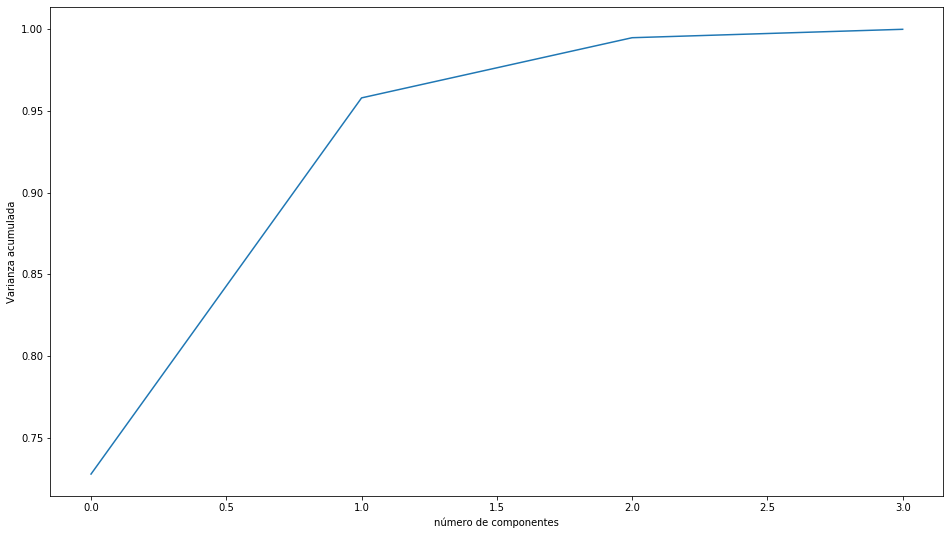

In [217]:
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('número de componentes')
plt.ylabel('Varianza acumulada')
plt.show()

In [218]:
pca12 = PCA(n_components = 3) 
pca12.fit(xS22) #Obtener las componentes principales
xPCA12 = pca12.transform(xS22)
xPCA12

array([[-2.26454173e+00,  5.05703903e-01, -1.21943348e-01],
       [-2.08642550e+00, -6.55404729e-01, -2.27250832e-01],
       [-2.36795045e+00, -3.18477311e-01,  5.14796236e-02],
       [-2.30419716e+00, -5.75367713e-01,  9.88604444e-02],
       [-2.38877749e+00,  6.74767397e-01,  2.14278490e-02],
       [-2.07053681e+00,  1.51854856e+00,  3.06842583e-02],
       [-2.44571134e+00,  7.45626750e-02,  3.42197636e-01],
       [-2.23384186e+00,  2.47613932e-01, -8.25744645e-02],
       [-2.34195768e+00, -1.09514636e+00,  1.53562399e-01],
       [-2.18867576e+00, -4.48629048e-01, -2.46559522e-01],
       [-2.16348656e+00,  1.07059558e+00, -2.64009373e-01],
       [-2.32737775e+00,  1.58587455e-01,  1.00165616e-01],
       [-2.22408272e+00, -7.09118158e-01, -2.23214514e-01],
       [-2.63971626e+00, -9.38281982e-01,  1.89570030e-01],
       [-2.19229151e+00,  1.88997851e+00, -4.69480095e-01],
       [-2.25146521e+00,  2.72237108e+00,  3.26037967e-02],
       [-2.20275048e+00,  1.51375028e+00

Se ha reducido el tamaño de la base de datos sin afectar negativamente su validez.

In [219]:
C3 = C2.sample(frac=0.9314, replace=False, random_state=1)

In [220]:
C3 = xPCA12

Utilizamos el criterio del codo para poder observar el númerod e grupos en la base de datos. Lo graficamos para apreciarlo visualmente.

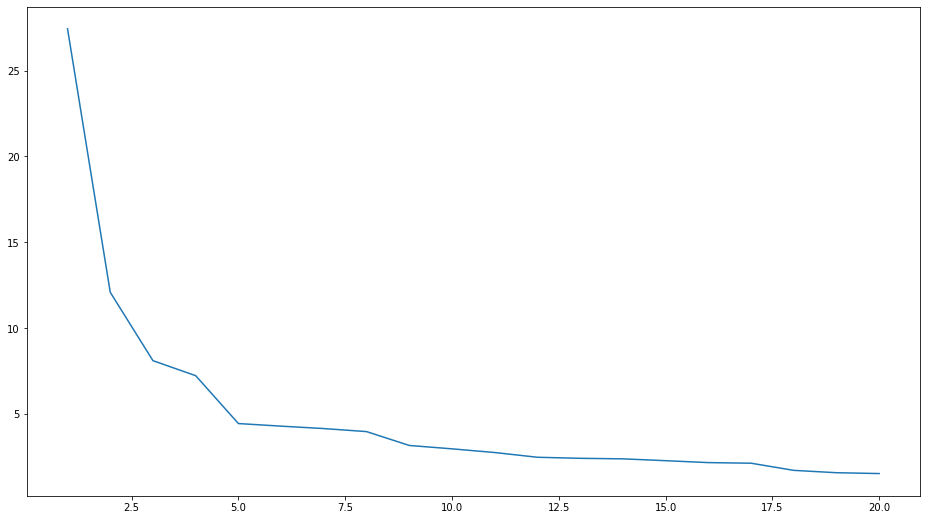

In [221]:
Z3 = hierarchy.linkage(C3, metric='euclidean', method = 'ward') 

last3 = Z3[-20:,2]
lastR3 = last3[::-1]
idxs3 = np.arange (1, len(lastR3)+1)
plt.plot(idxs3, lastR3)
plt.show()

Hacemos lo propio con el del gradiente.

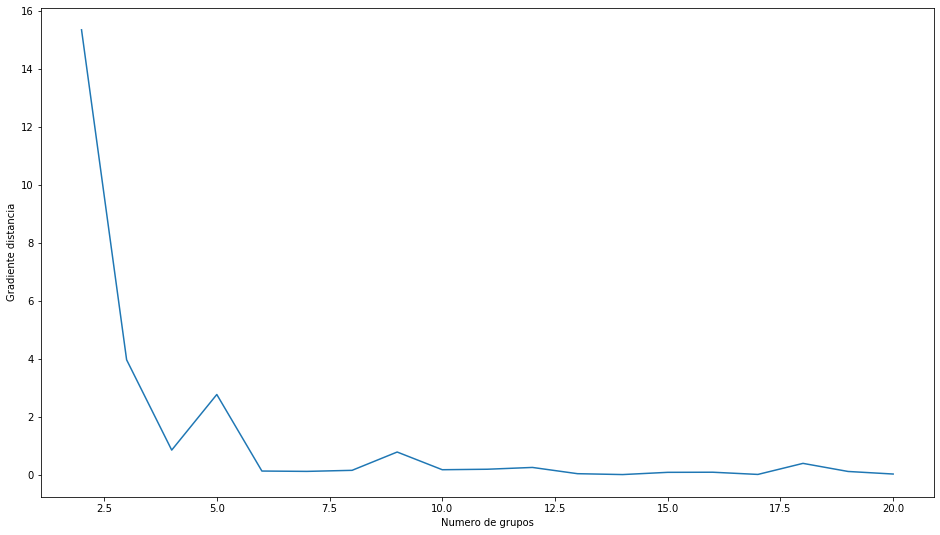

In [222]:
gradiente3 = np.diff(last3)
gradR3 = gradiente3[::-1] 
plt.plot(idxs3[1:],gradR3)

plt.xlabel('Numero de grupos')
plt.ylabel('Gradiente distancia')
plt.show()

Hemos conseguido el número cuatro, con esto se procede a utilizar el clustering.

In [223]:

GM3 = 4
G3 = hierarchy.fcluster(Z3, GM3, criterion='maxclust')

G3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 3, 4, 3, 4, 3, 4, 3, 3, 4, 3, 4, 4, 4,
       4, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 4, 3,
       4, 3, 3, 4, 3, 3, 3, 4, 4, 4, 3, 3, 2, 4, 2, 4, 2, 2, 3, 2, 4, 2,
       2, 4, 2, 4, 4, 2, 4, 2, 2, 3, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 4, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4], dtype=int32)

In [225]:
CL3 = C3[:,0]
UC3 = {'Grupos': G3,
                'No. de dato': CL3}
FO3 = pd.DataFrame(UC3)
FO3

,Grupos,No. de dato
0,1,-2.264542
1,1,-2.086426
2,1,-2.367950
3,1,-2.304197
4,1,-2.388777
...,...,...
145,2,1.870522
146,4,1.558492
147,4,1.520845
148,2,1.376391


El número conseguido fue 4, se mantiene acorde al consguido por el método del graiente y del codo. Se mantiene también un pvalue mayor a 95%.

<hr> 

### Reactivo 4 (2 ptos) <a name="Problema4"></a> 

En una fábrica de piezas automotrices detectaron que la calidad de las piezas que se producían podía evaluarse realizando las medidas de dos equipos dentro de la fábrica. Las categorías de calidad definidas son __“Bueno”, “Regular”, “Malo”__. Después de realizar varias muestran lograron crear una base de datos con algunas muestras ya clasificadas (dataset_2.csv).  Realicé el diseño de un clasificador de tipo regresión logítica que logré identificar las categorías especificadas en la base de datos. Entregue el código que se utilizó para el diseño del clasificador y justifique su respuesta por medio de medidas y graficas.

Abrimos y observamos la base de dato a utilizar.
Se modifica a manera de agregar una coulna nueva, que se utilizará para el Reactivo 4.

In [226]:
R4=pd.read_csv('../Data/dataset_2.csv')
R4

,V1,V2,Class
0,2.617734,0.955645,Malo
1,-0.993889,0.318978,Regular
2,-0.720172,-1.056636,Regular
3,0.015068,-1.534015,Bueno
4,-0.692463,-1.215470,Regular
...,...,...,...
1995,-0.990105,-1.733066,Regular
1996,-0.504777,-1.178994,Regular
1997,0.604868,0.691460,Malo
1998,1.557703,1.349335,Malo


In [227]:
R4['Numeric Class'] = ""
R4.head()

for c in range(data.shape[0]):
        if R4.iloc[c,2]=="Malo":
            R4.iloc[c,3]= 3
        if R4.iloc[c,2]=="Regular":
            R4.iloc[c,3]= 2
        if R4.iloc[c,2]=="Bueno":
            R4.iloc[c,3]= 1

R4.head(50)

,V1,V2,Class,Numeric Class
0,2.617734,0.955645,Malo,3
1,-0.993889,0.318978,Regular,2
2,-0.720172,-1.056636,Regular,2
3,0.015068,-1.534015,Bueno,1
4,-0.692463,-1.215470,Regular,2
5,1.617645,-0.938764,Bueno,1
6,0.278054,-0.293181,Bueno,1
7,1.077733,-1.843580,Bueno,1
8,1.416264,0.904256,Malo,3
9,2.556655,0.757581,Malo,3


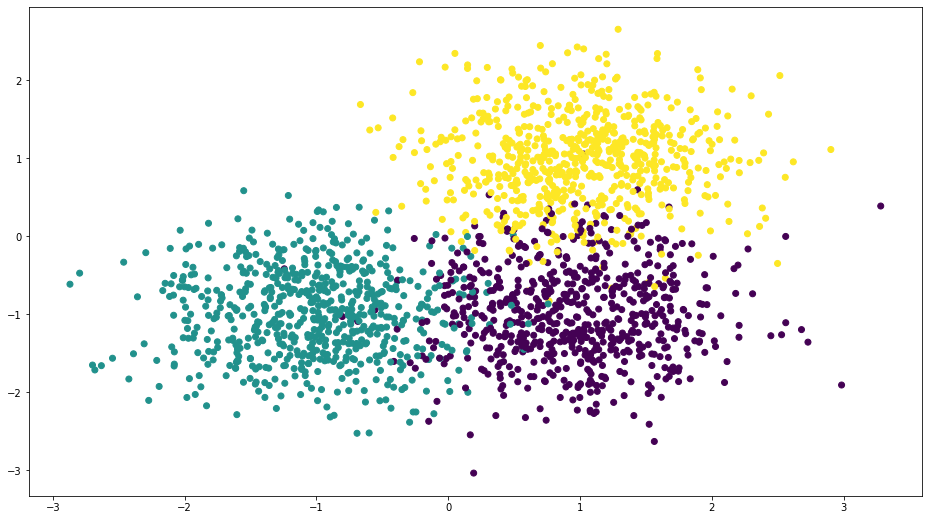

In [229]:
X = R4.iloc[:,0:2]
Y = R4.iloc[:,3]
plt.scatter(R4.iloc[:,0], R4.iloc[:,1], c = Y)
plt.show()

Creamos el polinomio y realizamos el entrenamiento con regresión logística.

In [242]:
NG7 = 7
P7 = PolynomialFeatures(NG7)
XA7 = P7.fit_transform(X)


M7 = linear_model.LogisticRegression(C=1e20)
M7.fit(XA7,Y)

YH7 = M7.predict(XA7)


ValueError: Unknown label type: 'unknown'

Evaluamos el modelo conseguido en el punto anterior.

In [235]:
accuracy_score(Y, YH7)

precision_score(Y, YH7)

recall_score(Y, YH7)

NameError: name 'YH7' is not defined

Visualizamos lo conseguido en el punto anterior.

In [241]:
h=0.01

xmin, xmax, ymin, ymax = R4[0].min(), R4[0].max(), R4[1].min(), R4[1].max()

xx, yy = np.meshgrid(np.arange(xmin,xmax,h), np.arange(ymin,ymax,h))

Xnew7 = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])

Xa_new7 = P7.fit_transform(Xnew7)

Z77 = modelo7.predict(Xa_new7)
Z77 = Z77.reshape(xx.shape)

plt.contour(xx, yy, Z77)
plt.scatter(R4.iloc[:,0], R4.iloc[:,1], c=Y)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()

KeyError: 0

Se consiguio un pvalue bastante alto con el poliniomio elegido. El plot también nos muestra que la clasificación fue elegida satisfactoriamente y con exito.

In [ ]:
ngrado=7
poly= PolynomialFeatures(ngrado)
Xa=poly.fit_transform(X)

#crear regresión logística
modelo=linear_model.LogisticRegression(C=1e20)
modelo.fit(Xa, Y)

Yhat=modelo.predict(Xa)

#Evaluar modelo 
accuracy_score(Y, Yhat)

precision_score(Y, Yhat)

recall_score(Y, Yhat)

#visualizar la frontera de separación 

h=0.01
xmin, xmax, ymin, ymax= X[0].min(), X[0].max(), X[1].min(), X[1].max()

xx, yy=np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax,h))

Xnew=pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])

Xa_new=poly.fit_transform(Xnew)

Z=modelo.predict(Xa_new)
Z=Z.reshape(xx.shape)

plt.contour(xx, yy, Z)
plt.scatter(X[0], X[1], c=Y)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()